Przyglądniemy się danym oraz przetworzymy je tak żeby można było na nich modelować. Chodzi głównie o dane kategoryczne na których musimy dokonać kodowania

In [2]:
# https://medium.com/databulls/tabular-playground-series-mar-2021-leaderboard-14-eda-feature-engineering-e5827982384e
# Dane zostały pobrane z poniższej lokalizacji 
# https://www.kaggle.com/c/tabular-playground-series-mar-2021/data

import pandas as pd
import numpy as np
import os

data_path = 'E:\page_ds\Optymalizatory_hiperparametrow'
data = pd.read_csv(os.path.join(data_path, "train.csv"))

train = pd.read_csv(os.path.join(data_path, "train.csv"))
test = pd.read_csv(os.path.join(data_path, "test.csv"))

train_y = train['target']
train_data = train.drop(columns=['id', 'target'])
test_data = test.drop(columns=['id'])

train_rows_len = train_data.shape[0]

train_test_data = pd.concat([train_data, test_data])

print(train_data.shape)
print(test_data.shape)
print(train_test_data.shape)

(300000, 30)
(200000, 30)
(500000, 30)


Text(0.5, 1.0, 'Histogram zmiennej celu')

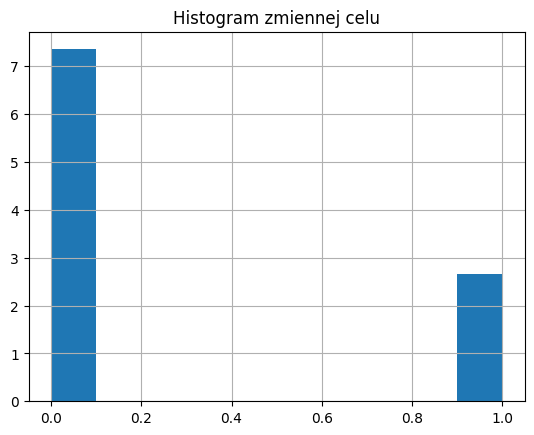

In [6]:
#wyświetlam rozkład zmiennej celu
import matplotlib.pyplot as plt
train_y.hist(density=True)  #dlaczego nie robi mi rozkładu gęstości tylko skala jest pełnoliczbowa?
plt.title("Histogram zmiennej celu")

In [ ]:
train_test_data.dtypes

cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
dtype: object

Jak widać na podstawie powyższego wykresu, zmienna celu jest nisko niezbalansowana. Uznaje się, że zmienna celu jest nisko niezbalansowana jeżeli najrzadziej występująca wartość rozkładu będzie w przedziale 20-40%, średnio zbalansowana jeżeli będzie w przedziale 1-20%, ekstremalnie niezbalansowane gdy <1%. Jeżeli będzie w przedziale 40-50% to uznajemy rozkład za zbalansowany 

Rozdzielamy zmienne ze względu na typ (numeryczny/kategoryczne) aby następnie potraktować te zbiory osobnymi metodami

In [17]:
data_categorical_pd  = train_test_data.loc[:,train_test_data.dtypes!=np.number]
data_numerical_pd  = train_test_data.loc[:,train_test_data.dtypes==np.number]

print('data_categorical_pd.shape: ', data_categorical_pd.shape)
print('data_numerical_pd.shape: ', data_numerical_pd.shape)

data_categorical_pd.shape:  (500000, 19)
data_numerical_pd.shape:  (500000, 11)


Pozbywamy się wartości nullowych (jak się okaże, nie ma ich w zbiorze

In [19]:
#train_test_data.isnull().sum()
categorical_missing_val_count = (data_categorical_pd.isnull().sum())
numerical_missing_val_count = (data_numerical_pd.isnull().sum())
print('categorical_missing_val_count')
print(categorical_missing_val_count[categorical_missing_val_count > 0])
print('numerical_missing_val_count')
print(numerical_missing_val_count[numerical_missing_val_count > 0])

categorical_missing_val_count
Series([], dtype: int64)
numerical_missing_val_count
Series([], dtype: int64)


Wartości odstające

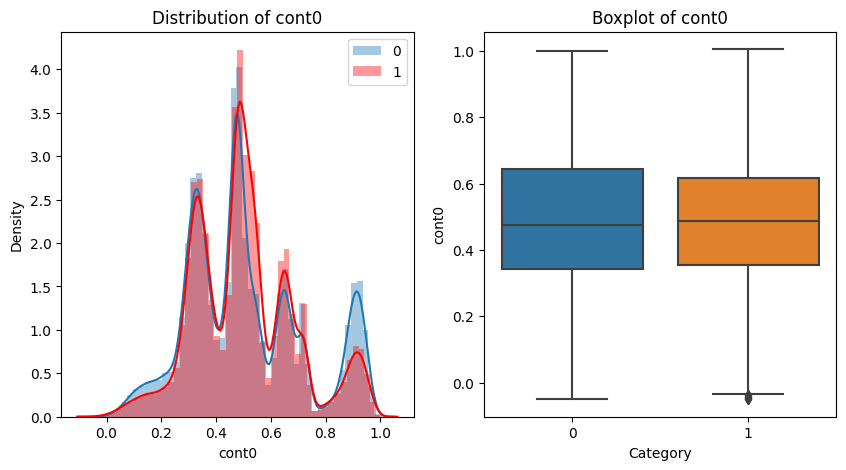

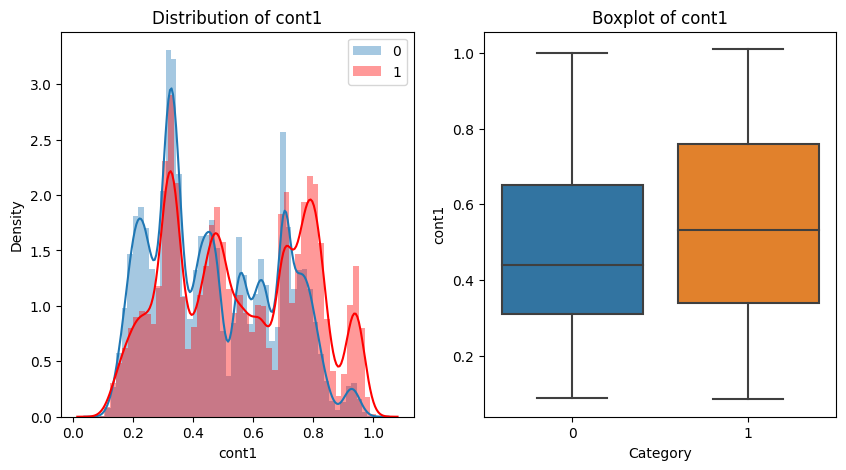

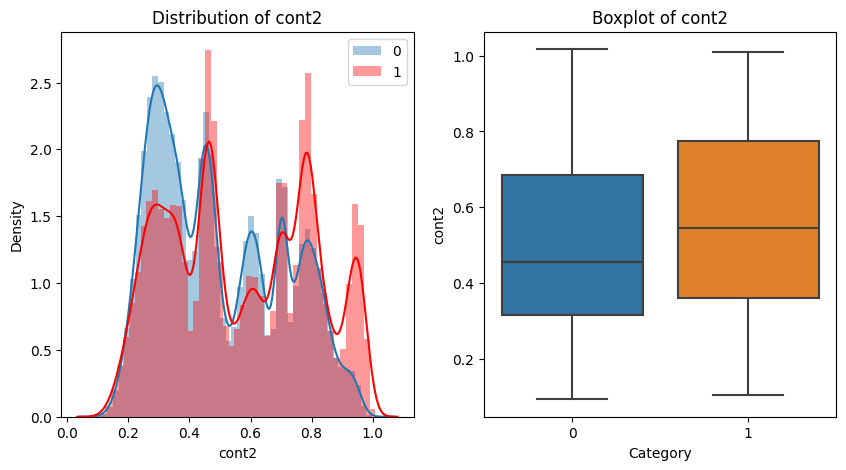

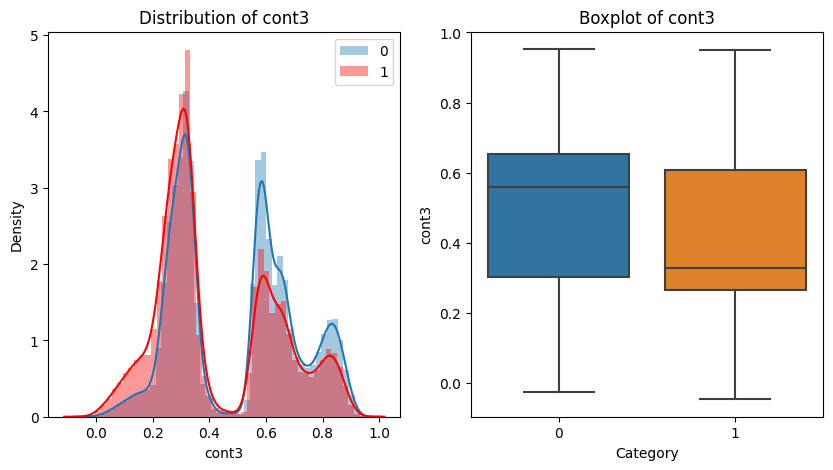

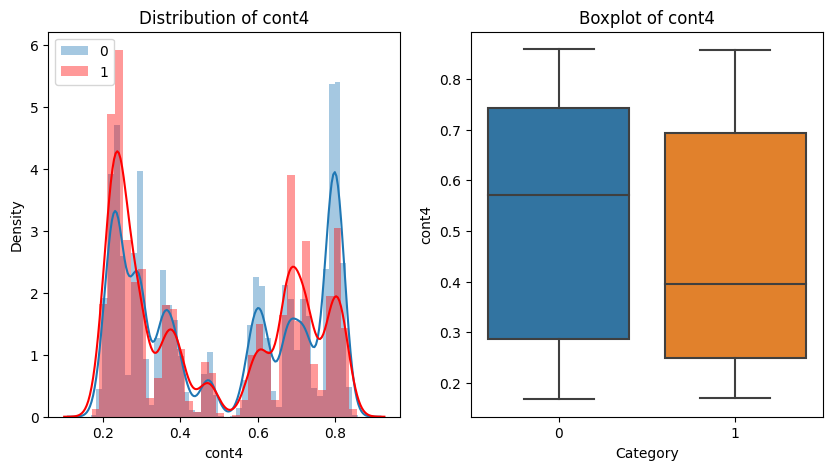

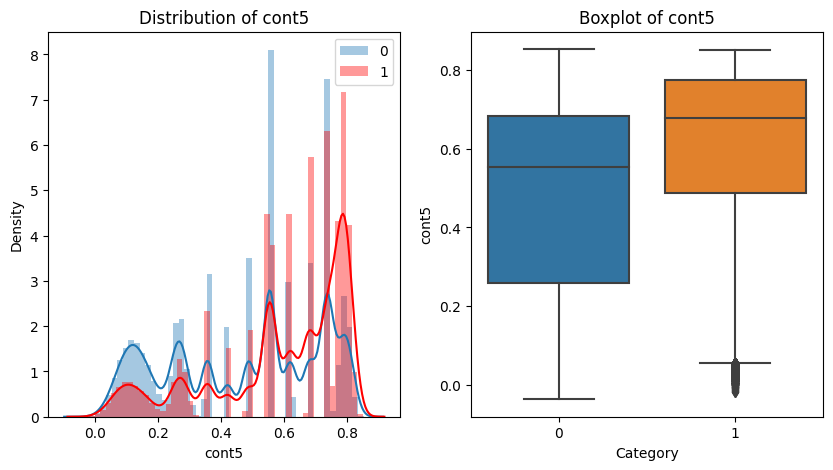

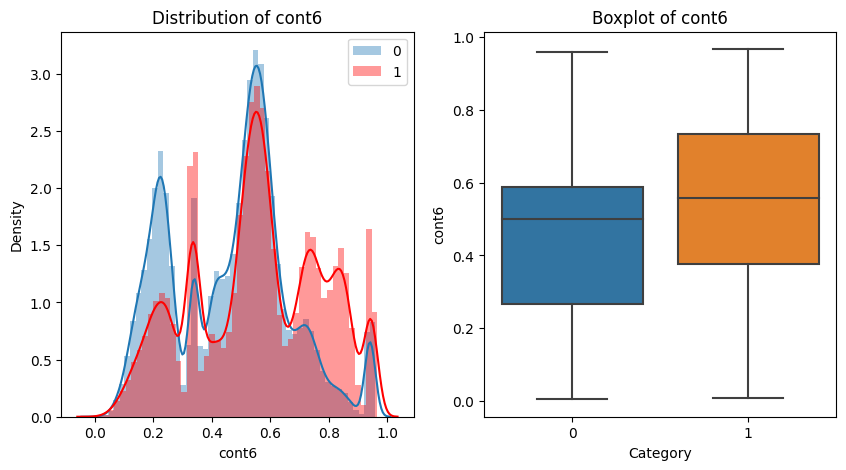

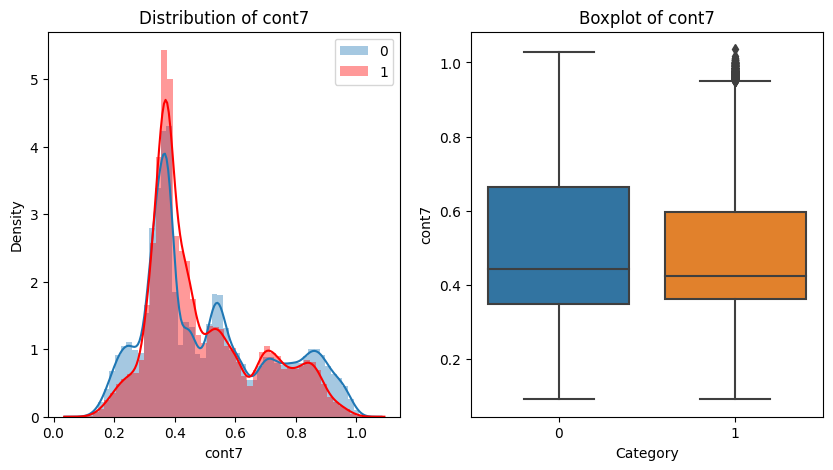

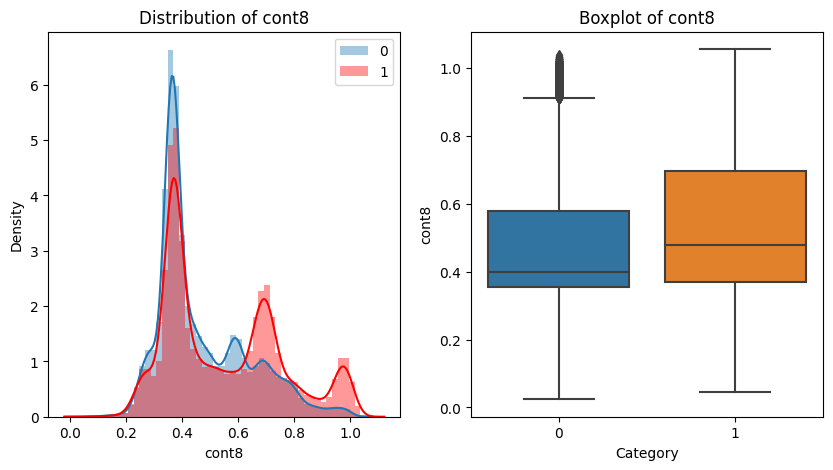

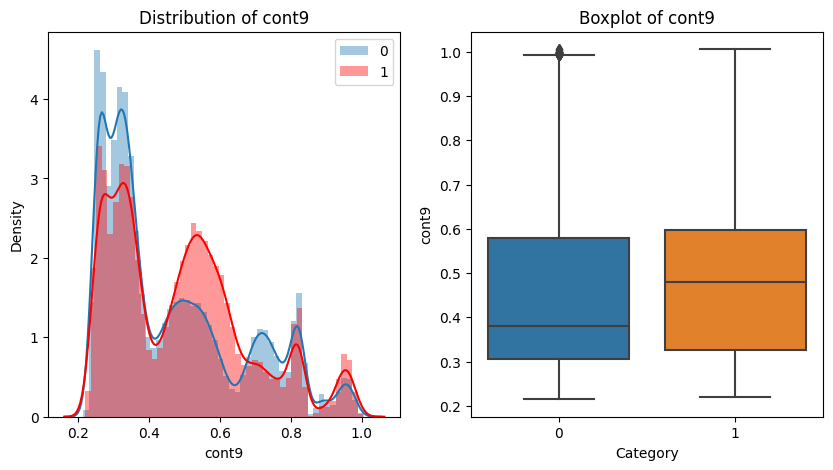

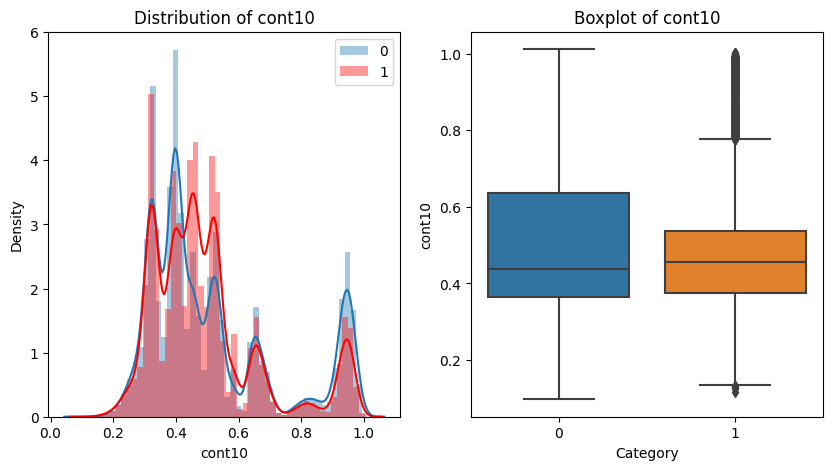

In [20]:
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Numerical
y_plot = train_y.copy()
y_plot.columns = ['target']
Data_plot = pd.concat([data_numerical_pd[:][:len(y_plot)], y_plot], axis=1)
for feature in data_numerical_pd.columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    plot10 = sns.distplot(Data_plot[Data_plot['target']==0][feature],ax=ax1, label='0')
    sns.distplot(Data_plot[Data_plot['target']==1][feature],ax=ax1,color='red', label='1')
    plot10.axes.legend()
    ax1.set_title('Distribution of {name}'.format(name=feature))
    sns.boxplot(x='target',y=feature,data=Data_plot,ax=ax2)
    ax2.set_xlabel('Category') 
    ax2.set_title('Boxplot of {name}'.format(name=feature))
    fig.show()

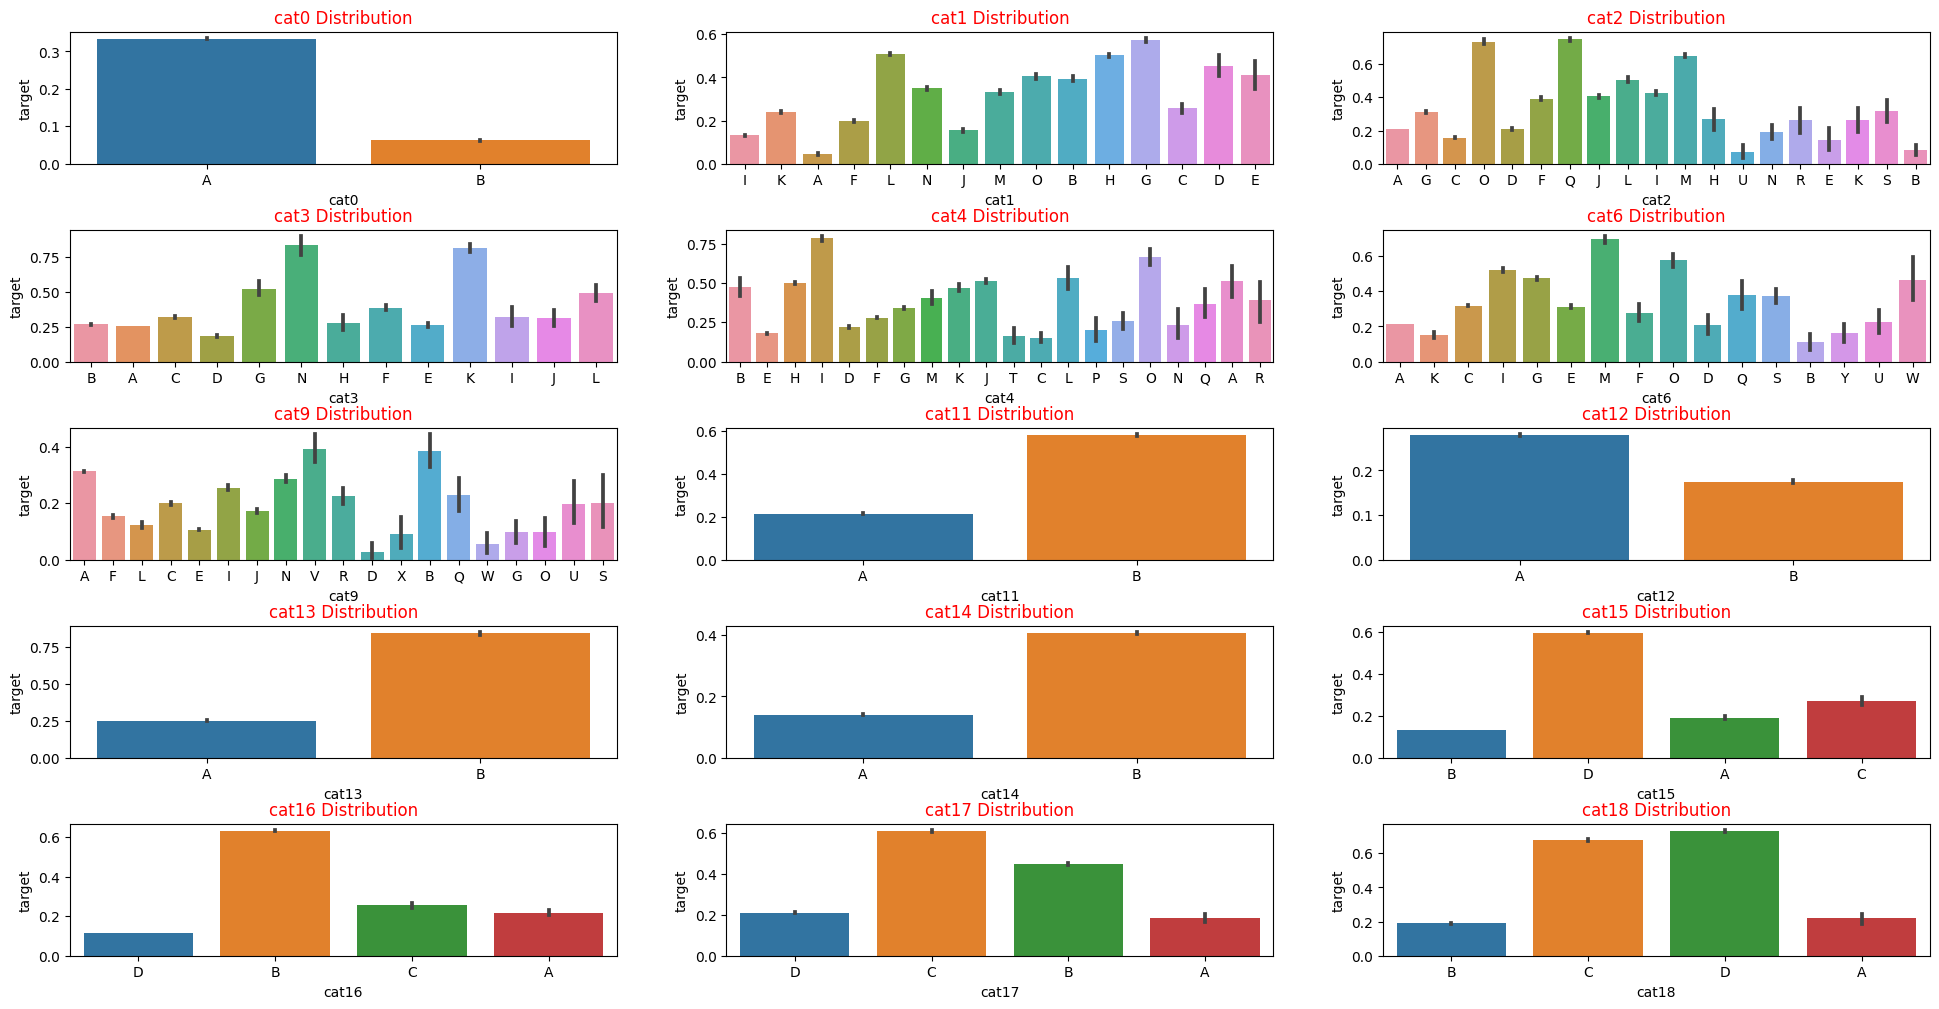

In [21]:
data_plot = pd.concat([data_categorical_pd[:][:len(y_plot)], y_plot], axis=1)
feature_list = []
for col in data_categorical_pd.columns:
    if len(data_categorical_pd[col].unique()) <= 20:
        feature_list.append(col)

n_cols = 3
nrows = round(len(feature_list) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(24, 12))
plt.subplots_adjust(hspace=0.5)

index = 0
for row in range(nrows):
    for col in range(n_cols):
        feature = feature_list[index]
        
        sns.barplot(x=feature, y='target', data=data_plot, ax=axes[row][col])
        axes[row][col].set_title(feature + ' Distribution', color = 'red')
        
        index += 1
plt.show()